In [96]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

URL = 'https://krisha.kz/prodazha/kvartiry/'
HEADERS = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36',
          'accept':'*/*'}

data = {'name':[],'rooms':[],'city':[],'addres':[],'area':[],'price':[],'text':[],'link':[]}

def get_html(url, params = None):
    r = requests.get(url,headers = HEADERS,params = params)
    return r

    

def get_content(html):
    soup = BeautifulSoup(html,'html.parser')
    items = soup.find_all('div',class_ ='a-card__descr')
    for item in items:
        data['name'].append(item.find('a',class_ ="a-card__title").get_text())
        data['rooms'].append(re.findall(r'\d+',item.find('a',class_ ="a-card__title").get_text().split(',')[0])[0])
        data['area'].append(re.findall(r'\d+',item.find('a',class_ ="a-card__title").get_text().split(',')[1])[0])
        
        data['price'].append(''.join(re.findall(r'\d+',item.find('div',class_ ="a-card__price").get_text())))
        data['addres'].append(item.find('div',class_ ="a-card__subtitle").get_text().strip())
        
        data['text'].append(item.find('div',class_ ="a-card__text-preview").get_text().strip())
        data['link'].append('https://krisha.kz' + item.find('a',class_ ="a-card__title").get('href').strip())
        data['city'].append(item.find('div',class_ ="card-stats__item").get_text().strip())
    
        
def parse():
    #300 страниц
    for i in range(1,500):
        html = get_html(URL + '?page='+str(i))

        if html.status_code == 200:

            get_content(html.text)

        else:
            print('Error: 1')
        
        
parse()
df = pd.DataFrame(data)
df.head()


,name,rooms,city,addres,area,price,text,link
0,"3-комнатная квартира, 140 м², 8/9 этаж",3,Нур-Султан (Астана),"Есильский р-н, Умай Ана 15",140,57900000,"жил. комплекс Paris, кирпичный дом, 2020 г.п.,...",https://krisha.kz/a/show/668894484
1,"2-комнатная квартира, 44 м², 3/5 этаж",2,Алматы,"Алмалинский р-н, мкр Тастак-2 41а",44,23000000,"панельный дом, 1982 г.п., состояние: среднее, ...",https://krisha.kz/a/show/669815216
2,"2-комнатная квартира, 107.8 м²",2,Актау,14-й мкр 73,107,48510000,"жил. комплекс Khazar Palace, 18 этажей, 2019 г...",https://krisha.kz/a/show/669912546
3,"2-комнатная квартира, 56 м², 4/4 этаж",2,Темиртау,проспект строителей 21,56,7200000,"1960 г.п., потолки 3м., санузел раздельный, Пр...",https://krisha.kz/a/show/667706458
4,"4-комнатная квартира, 72 м², 5/5 этаж",4,Шымкент,проспект Кабанбай батыра 17,72,17500000,"1990 г.п., состояние: хорошее, санузел раздель...",https://krisha.kz/a/show/57040025


In [107]:
df['price'] = df['price'].astype('int64')
df['rooms'] = df['rooms'].astype(int)
df['area'] = df['area'].astype(int)

<AxesSubplot:title={'center':'Top 5 most expensive cites in krisha'}, xlabel='city'>

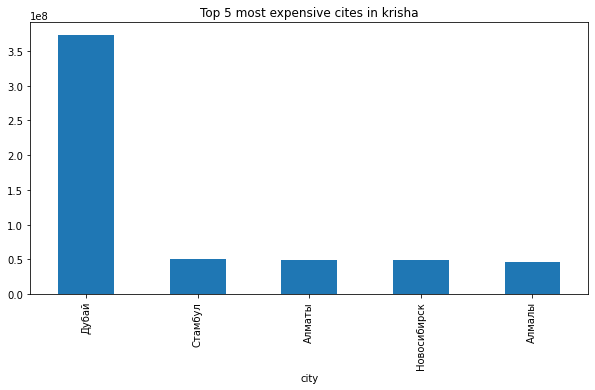

In [114]:
df.groupby('city').mean().sort_values('price',ascending = False).price.head(5).plot(kind = 'bar',figsize = (10,5),title = 'Top 5 most expensive cites in krisha')


<AxesSubplot:title={'center':'Top 5 cheapest cites in krisha'}, xlabel='city'>

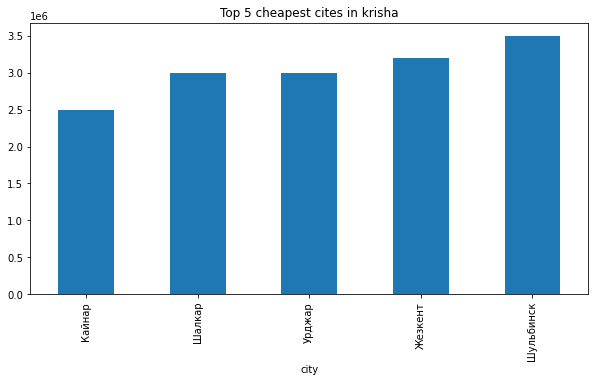

In [115]:
df.groupby('city').mean().sort_values('price',ascending = True).price.head(5).plot(kind = 'bar',figsize = (10,5),title = 'Top 5 cheapest cites in krisha')

In [116]:
df.to_csv('Krisha_19_09_2021.csv')